In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster

pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_rows = 1000

In [2]:
data = pd.read_csv('sales-data.csv',parse_dates=['barr_date'])
data = data[(data.region_name=="India") & (data.business_area_name=="B00 - LTC")]
data.rename(columns={"barr_date":"date","revenue": "sales"}, inplace=True)
display(data.head())

data = data[['date','sales']]
data.reset_index(drop=True, inplace=True)
data.head()

,business_area_name,region_name,date,sales
67,B00 - LTC,India,2017-01-01,616272.70
77,B00 - LTC,India,2017-02-01,609394.80
110,B00 - LTC,India,2017-03-01,530039.35
135,B00 - LTC,India,2017-04-01,519744.33
146,B00 - LTC,India,2017-05-01,751616.79


,date,sales
0,2017-01-01,616272.70
1,2017-02-01,609394.80
2,2017-03-01,530039.35
3,2017-04-01,519744.33
4,2017-05-01,751616.79


In [3]:
data.shape

(60, 2)

<AxesSubplot:xlabel='Date', ylabel='Values'>

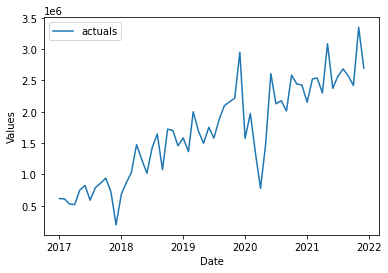

In [4]:
f = Forecaster(y=data['sales'],current_dates=data['date'])
f.plot()

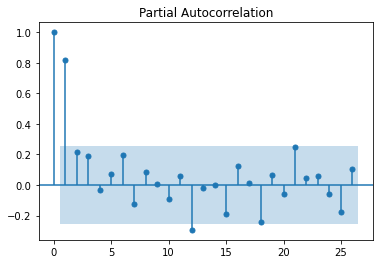

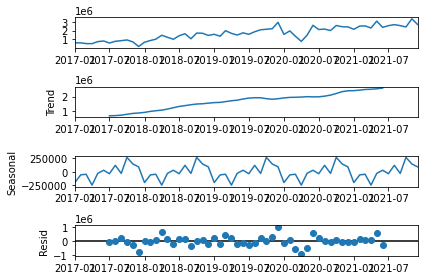

In [5]:
f.plot_pacf(lags=26)
plt.show()

f.seasonal_decompose().plot()
plt.show()

In [6]:
f.set_test_length(12)
f.generate_future_dates(12)
f.set_estimator('lstm')

Epoch 1/200
1/1 [==============================] - 59s 59s/step - loss: 0.6276 - val_loss: 0.6150
Epoch 2/200
1/1 [==============================] - 0s 297ms/step - loss: 0.6190 - val_loss: 0.6000
Epoch 3/200
1/1 [==============================] - 0s 312ms/step - loss: 0.6041 - val_loss: 0.5712
Epoch 4/200
1/1 [==============================] - 0s 294ms/step - loss: 0.5753 - val_loss: 0.5129
Epoch 5/200
1/1 [==============================] - 0s 271ms/step - loss: 0.5170 - val_loss: 0.3912
Epoch 6/200
1/1 [==============================] - 0s 269ms/step - loss: 0.4072 - val_loss: 0.2786
Epoch 7/200
1/1 [==============================] - 0s 280ms/step - loss: 0.2862 - val_loss: 0.3383
Epoch 8/200
1/1 [==============================] - 0s 273ms/step - loss: 0.3450 - val_loss: 0.2588
Epoch 9/200
1/1 [==============================] - 0s 279ms/step - loss: 0.2616 - val_loss: 0.1753
Epoch 10/200
1/1 [==============================] - 0s 276ms/step - loss: 0.2026 - val_loss: 0.1730
Epoch 11/2

1/1 [==============================] - 0s 279ms/step - loss: 0.1565 - val_loss: 0.1224
Epoch 84/200
1/1 [==============================] - 0s 274ms/step - loss: 0.1566 - val_loss: 0.1230
Epoch 85/200
1/1 [==============================] - 0s 282ms/step - loss: 0.1564 - val_loss: 0.1227
Epoch 86/200
1/1 [==============================] - 0s 289ms/step - loss: 0.1569 - val_loss: 0.1246
Epoch 87/200
1/1 [==============================] - 0s 269ms/step - loss: 0.1570 - val_loss: 0.1257
Epoch 88/200
1/1 [==============================] - 0s 282ms/step - loss: 0.1571 - val_loss: 0.1251
Epoch 89/200
1/1 [==============================] - 0s 284ms/step - loss: 0.1568 - val_loss: 0.1232
Epoch 90/200
1/1 [==============================] - 0s 287ms/step - loss: 0.1565 - val_loss: 0.1205
Epoch 91/200
1/1 [==============================] - 0s 285ms/step - loss: 0.1568 - val_loss: 0.1209
Epoch 92/200
1/1 [==============================] - 0s 267ms/step - loss: 0.1568 - val_loss: 0.1213
Epoch 93/200


1/1 [==============================] - 0s 267ms/step - loss: 0.1570 - val_loss: 0.1203
Epoch 165/200
1/1 [==============================] - 0s 282ms/step - loss: 0.1572 - val_loss: 0.1199
Epoch 166/200
1/1 [==============================] - 0s 274ms/step - loss: 0.1573 - val_loss: 0.1207
Epoch 167/200
1/1 [==============================] - 0s 265ms/step - loss: 0.1571 - val_loss: 0.1213
Epoch 168/200
1/1 [==============================] - 0s 287ms/step - loss: 0.1569 - val_loss: 0.1216
Epoch 169/200
1/1 [==============================] - 0s 281ms/step - loss: 0.1567 - val_loss: 0.1212
Epoch 170/200
1/1 [==============================] - 0s 278ms/step - loss: 0.1566 - val_loss: 0.1224
Epoch 171/200
1/1 [==============================] - 0s 273ms/step - loss: 0.1569 - val_loss: 0.1236
Epoch 172/200
1/1 [==============================] - 0s 278ms/step - loss: 0.1569 - val_loss: 0.1230
Epoch 173/200
1/1 [==============================] - 0s 286ms/step - loss: 0.1567 - val_loss: 0.1216
Epoc

Epoch 46/200
2/2 [==============================] - 1s 266ms/step - loss: 0.1160 - val_loss: 0.1762
Epoch 47/200
2/2 [==============================] - 0s 259ms/step - loss: 0.1189 - val_loss: 0.1601
Epoch 48/200
2/2 [==============================] - 0s 264ms/step - loss: 0.1194 - val_loss: 0.1384
Epoch 49/200
2/2 [==============================] - 0s 250ms/step - loss: 0.1205 - val_loss: 0.1312
Epoch 50/200
2/2 [==============================] - 0s 261ms/step - loss: 0.1217 - val_loss: 0.1476
Epoch 51/200
2/2 [==============================] - 0s 258ms/step - loss: 0.1195 - val_loss: 0.1778
Epoch 52/200
2/2 [==============================] - 0s 264ms/step - loss: 0.1199 - val_loss: 0.1881
Epoch 53/200
2/2 [==============================] - 1s 261ms/step - loss: 0.1198 - val_loss: 0.1745
Epoch 54/200
2/2 [==============================] - 0s 256ms/step - loss: 0.1165 - val_loss: 0.1552
Epoch 55/200
2/2 [==============================] - 0s 253ms/step - loss: 0.1170 - val_loss: 0.1386


2/2 [==============================] - 0s 259ms/step - loss: 0.0993 - val_loss: 0.1477
Epoch 128/200
2/2 [==============================] - 0s 259ms/step - loss: 0.0988 - val_loss: 0.1494
Epoch 129/200
2/2 [==============================] - 0s 250ms/step - loss: 0.0974 - val_loss: 0.1532
Epoch 130/200
2/2 [==============================] - 1s 270ms/step - loss: 0.0965 - val_loss: 0.1562
Epoch 131/200
2/2 [==============================] - 0s 263ms/step - loss: 0.0965 - val_loss: 0.1571
Epoch 132/200
2/2 [==============================] - 1s 267ms/step - loss: 0.0975 - val_loss: 0.1564
Epoch 133/200
2/2 [==============================] - 0s 269ms/step - loss: 0.0971 - val_loss: 0.1523
Epoch 134/200
2/2 [==============================] - 0s 263ms/step - loss: 0.0966 - val_loss: 0.1476
Epoch 135/200
2/2 [==============================] - 1s 265ms/step - loss: 0.0978 - val_loss: 0.1463
Epoch 136/200
2/2 [==============================] - 0s 263ms/step - loss: 0.0963 - val_loss: 0.1485
Epoc

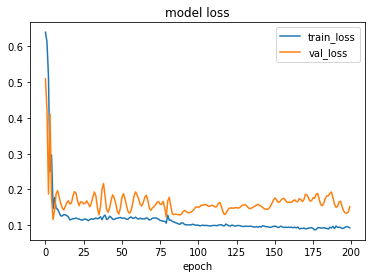

In [7]:
f.manual_forecast(call_me='lstm',
                  lags=24,
                  batch_size=16,
                  epochs=200,
                  validation_split=.20,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(100,)*15,
                  dropout=(0,)*15,
                  plot_loss=True)

<AxesSubplot:xlabel='Date', ylabel='Values'>

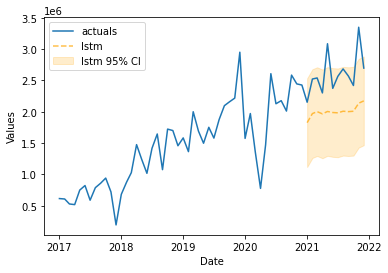

In [8]:
f.plot_test_set(ci=True)

<AxesSubplot:xlabel='Date', ylabel='Values'>

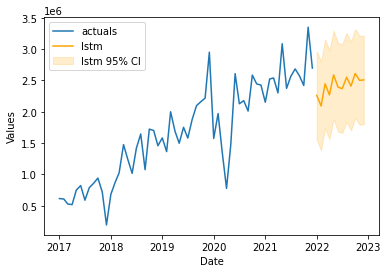

In [9]:
f.generate_future_dates(12)
f.add_time_trend()
f.export(to_excel=True,excel_name='results.xlsx')
f.plot(ci=True)

In [10]:
f.export('model_summaries',determine_best_by='LevelTestSetMAPE')[
    ['ModelNickname',
     'LevelTestSetMAPE',
     'LevelTestSetRMSE',
     'LevelTestSetR2',
     'best_model']
]

,ModelNickname,LevelTestSetMAPE,LevelTestSetRMSE,LevelTestSetR2,best_model
0,lstm,0.22,655067.86,-3.31,True


In [11]:
test_2021 = f.export_test_set_preds_with_cis('lstm')
display(test_2021.head(12))

predicted_2022 = f.export_forecasts_with_cis('lstm')
display(predicted_2022.head(12))

,DATE,UpperPreds,Preds,Actuals,LowerPreds,ModelNickname,CILevel
0,2021-01-01,2533225.24,1826292.90,2152082.08,1119360.56,lstm,0.95
1,2021-02-01,2677708.44,1970776.11,2521893.71,1263843.77,lstm,0.95
2,2021-03-01,2709093.98,2002161.64,2539024.69,1295229.31,lstm,0.95
3,2021-04-01,2673109.59,1966177.26,2300424.12,1259244.92,lstm,0.95
4,2021-05-01,2711674.61,2004742.27,3084572.51,1297809.93,lstm,0.95
5,2021-06-01,2695116.90,1988184.56,2373206.48,1281252.23,lstm,0.95
6,2021-07-01,2689718.67,1982786.33,2564508.75,1275853.99,lstm,0.95
7,2021-08-01,2715582.72,2008650.38,2683001.49,1301718.05,lstm,0.95
8,2021-09-01,2708958.59,2002026.25,2570230.32,1295093.91,lstm,0.95
9,2021-10-01,2715034.26,2008101.93,2418535.12,1301169.59,lstm,0.95


,DATE,UpperForecast,Forecast,LowerForecast,ModelNickname,CILevel
0,2022-01-01,2967919.84,2260987.50,1554055.17,lstm,0.95
1,2022-02-01,2799178.79,2092246.46,1385314.12,lstm,0.95
2,2022-03-01,3152921.11,2445988.77,1739056.43,lstm,0.95
3,2022-04-01,2975720.96,2268788.63,1561856.29,lstm,0.95
4,2022-05-01,3294488.28,2587555.94,1880623.61,lstm,0.95
5,2022-06-01,3099493.35,2392561.01,1685628.68,lstm,0.95
6,2022-07-01,3075745.49,2368813.15,1661880.82,lstm,0.95
7,2022-08-01,3256632.91,2549700.58,1842768.24,lstm,0.95
8,2022-09-01,3116138.62,2409206.29,1702273.95,lstm,0.95
9,2022-10-01,3316683.73,2609751.39,1902819.06,lstm,0.95


In [12]:
Total_2021 = test_2021['Actuals'].sum()
Total_2022 = predicted_2022['Forecast'].sum()

Yoy_growth = (Total_2022 - Total_2021)/ Total_2021 * 100

print(f'Total_2021:{Total_2021}')
print(f'Total_2022:{Total_2022}')
print(f'YOY (growth):{Yoy_growth}')

Total_2021:31251180.611773
Total_2022:28994484.84720049
YOY (growth):-7.221153634504171
